<a href="https://colab.research.google.com/github/anaipsilva/TESE/blob/main/C%C3%B3pia_de_cnn_primeira_vggnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import keras as keras
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import sklearn

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#train_df=pd.read_csv("/content/drive/MyDrive/TESE/X_train.csv")
#valid_df=pd.read_csv("/content/drive/MyDrive/TESE/X_test.csv")

In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/TESE/X_data.csv")

In [ ]:
data=data_df.values

In [ ]:
data=data/data.max()

In [ ]:
#x_train=train_df.values
#x_valid=valid_df.values

In [ ]:
#print(x_train.shape)
y_train.shape

(14496,)

In [ ]:
#ytrain_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels_train.csv")
#yvalid_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels_test_teste.csv", header=None)

In [ ]:
labels_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels.csv", header=0)

In [ ]:
labels=labels_df['Labels'].values

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(data,labels, test_size=0.20, random_state=35, stratify=labels)

In [ ]:
#y_train=ytrain_df['Labels'].values
#y_valid=yvalid_df['Labels'].values

In [ ]:
x_train.shape

(14496, 100, 100, 1)

In [ ]:
y_valid[1]

0

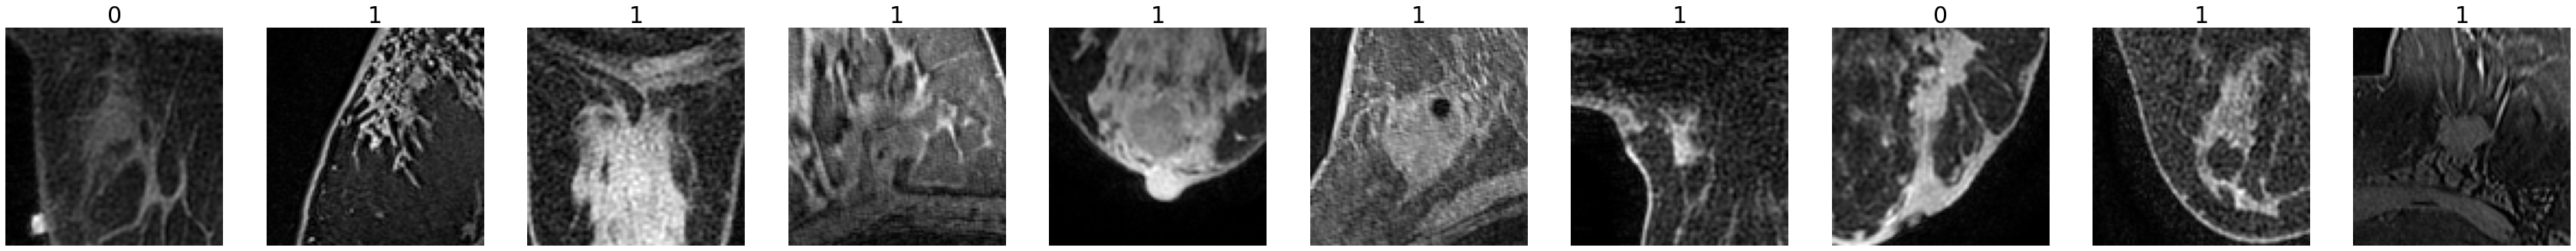

In [ ]:
plt.figure(figsize=(60,60))

num_images = 10
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(100,100)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

10299

In [ ]:
x_train=x_train / 10299
x_valid=x_valid / 10299

In [ ]:
x_train = x_train.reshape(-1,100,100,1)
x_valid = x_valid.reshape(-1,100,100,1)

In [ ]:
num_classes=2
if not y_train.shape[-1] == 2:
  y_train=keras.utils.np_utils.to_categorical(y_train, num_classes)
  y_valid=keras.utils.np_utils.to_categorical(y_valid, num_classes)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def model_builder(metrics=METRICS, output_bias=None):
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(100, 100, 1)))
  model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
  model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
  model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
  model.add(Flatten())
  model.add(Dense(units=1024, activation="relu"))
  model.add(Dropout(0.3))
  model.add(Dense(units=num_classes, activation="softmax"))
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model

In [ ]:
model = model_builder()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 conv2d_31 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 batch_normalization_9 (Batc  (None, 100, 100, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_32 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 50, 50, 128)      

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=True, # randomly flip images vertically
)  

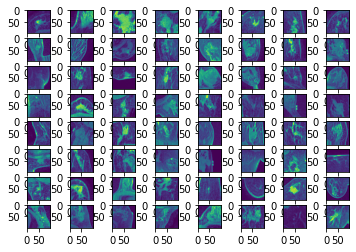

In [ ]:
batch_size = 64
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=8, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [ ]:
datagen.fit(x_train)

In [ ]:
#model = Sequential()
#model.add(Dense(units = 512, activation='relu', input_shape=(10000,)))
#model.add(Dense(units = 512, activation='relu'))
#model.add(Dense(units = num_classes, activation='softmax'))

In [ ]:
history=model.fit(img_iter, epochs=10, steps_per_epoch=len(x_train)/batch_size, validation_data=(x_valid, y_valid))

Epoch 1/10
  9/226 [>.............................] - ETA: 1:52:19 - loss: 31757.7852 - tp: 320.0000 - fp: 256.0000 - tn: 320.0000 - fn: 256.0000 - accuracy: 0.5556 - precision: 0.5556 - recall: 0.5556 - auc: 0.5138 - prc: 0.5034

In [ ]:
#history=model.fit(x_train, y_train, epochs= 10, verbose=1, validation_data=(x_valid, y_valid))

In [ ]:
model.save('/content/drive/MyDrive/TESE/model_vgg2_meanerror')

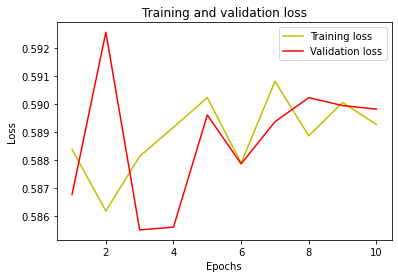

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

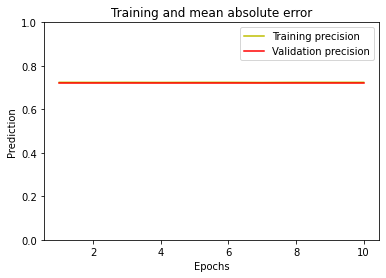

In [ ]:
precision = history.history['precision']
val_precision = history.history['val_precision']
ymin=0
ymax=1
plt.plot(epochs, precision, 'y', label='Training precision')
plt.plot(epochs, val_precision, 'r', label='Validation precision')
plt.ylim([ymin, ymax])
plt.title('Training and mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Prediction')
plt.legend()
plt.show()

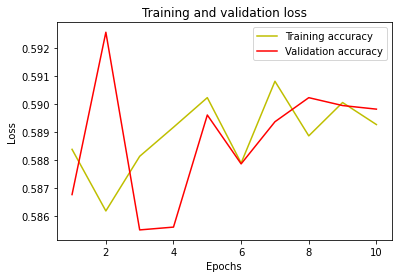

In [ ]:
#plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

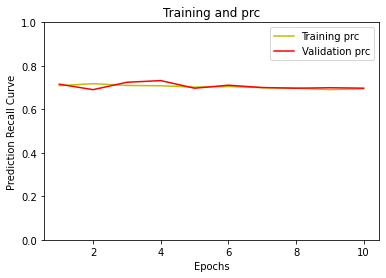

In [ ]:
prc = history.history['prc']
val_prc = history.history['val_prc']
ymin=0
ymax=1
plt.plot(epochs, prc, 'y', label='Training prc')
plt.plot(epochs, val_prc, 'r', label='Validation prc')
plt.ylim([ymin, ymax])
plt.title('Training and prc')
plt.xlabel('Epochs')
plt.ylabel('Prediction Recall Curve')
plt.legend()
plt.show()

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

114/114 [==============================] - 4s 33ms/step


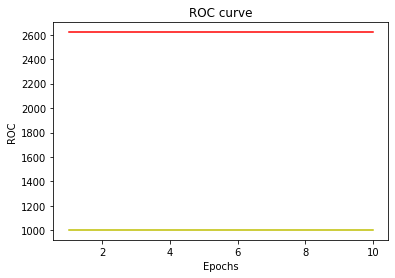

In [ ]:
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(x_valid).ravel()
thresholds=0.908
fp = history.history['val_fp']
tp = history.history['val_tp']
#fp, tp, thresholds = roc_curve(y_valid, y_preds).ravel
plt.figure(1)
plt.plot(epochs, fp, 'y', label='False positive rate')
plt.plot(epochs, tp, 'r', label='True positive rate')
#plt.plot(tpr, prc, 'r', label='Training prc')
plt.xlabel('Epochs')
plt.ylabel('ROC')
plt.title('ROC curve')
plt.show()

1/1 [==============================] - 0s 19ms/step
The prediction for this image is:  [[0.26044467 0.73955536]]
The actual label for this image is:  [0. 1.]


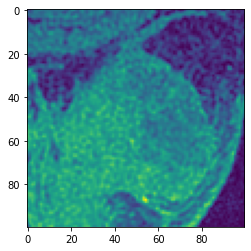

In [ ]:
n=220 #Select the index of image to be loaded for testing
img = x_valid[n]
image = img.reshape(100,100)
plt.imshow(image)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_valid[n])